In [1]:
# from sklearn.datasets import make_regression
# import matplotlib.pyplot as plt
# import numpy as np

# X, y= make_regression(n_samples=100, n_features=1, noise=1.0, bias=50)
# y = y.reshape(y.shape[0],1)


# -*- coding: utf-8 -*-
"""
Created on Fri Apr 10 15:47:40 2020

@author: usman
"""

from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

X, y= make_regression(n_samples=100, n_features=1, noise=1.0, bias=50)

y = y.reshape(y.shape[0],1)



In [2]:
print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


In [3]:
def define_parameters(n_weights):
    a = np.random.randn( n_weights, 1)
    b = np.random.randn()
    return a, b

In [4]:
def predictions(a, b , X):
    z = np.dot(X,a) + b
    return z

In [5]:
def find_cost(z,y):
    m = y.shape[0]
    total_cost = (1/m)* np.sum(np.square(z - y))
    return total_cost

In [6]:
def find_derivatives(X, y, z):
    m = y.shape[0]
    dz = (1/m)*(z-y)
    da = np.dot(X.T, dz)
    db = np.sum(dz)
    
    return da, db

In [7]:
def update_parameters(a, b, da, db, lr):
    a = a - lr * da
    b = b - lr * db
    
    return a, b

In [8]:
def linear_regression1(X, y, lr, epochs):
    error_list = []
    lenw = X.shape[1]
    a,b = define_parameters(lenw)
    
    for i in range(epochs):
        z = predictions(a, b, X)
        cost = find_cost(z,y)
        error_list.append(cost)
        da, db = find_derivatives(X, y, z)
        a, b = update_parameters(a, b, da, db, lr)
        if i % 50 == 0 :
            print(cost)
            
    return a, b, error_list

In [9]:
lr = 0.01
epochs = 1000
a, b, error_list = linear_regression1(X,y,lr,epochs)

9282.17583757603
3242.0708640209937
1162.1976483010899
426.0264214645784
159.22230445995402
60.6331026449886
23.64090989050089
9.597514978442227
4.219410056934621
2.1465454161485016
1.3438901950665991
1.032048989545961
0.9106071387032943
0.8632338258173294
0.8447319726561406
0.8374999391771194
0.8346714043908366
0.8335646724634752
0.8331315112089186
0.8329619426407782


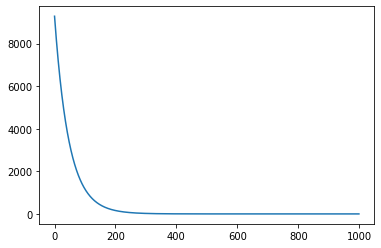

In [10]:
plt.plot(error_list)

In [11]:
print(a.shape)

(1, 1)


## Exercise 2.1

### Quesion 1
Which function is used at the last step to find the total error in case of logistic regression:
    
1. Mean Absolute Error
2. Sigmoid Function
3. Mean Squared Error
4. None of the above

Answer: 2


### Quesion 2
The number of weights + bias should be:
    
1. Equal to the number of input feature in the data
2. More than the number of input features
3. Less than the number of input features
4. One more than the number of input features

Answer: 4


### Quesion 3

The purpose of gradient descent is to:
    
1. Minimize weights
2. Minimize bias
3. Maxmimize cost
4. Minimize cost

Answer: 4

## Exercise 2.2
Using the following dataset, apply logistic regression function to classify diabetic and non-diabetic patients. Print the accuracy as well. You can take help from section 2.2. of Chapter 2.

In [12]:
import pandas as pd
import numpy as np

dataset = pd.read_csv("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
X = dataset.drop(['Outcome'], axis=1).values

y = dataset['Outcome'].values

y = y.reshape(y.shape[0],1)

def define_parameters(n_weights):
    w = np.random.randn( n_weights, 1)
    b = np.random.randn()
    
    return w, b

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

def predictions(w, b, X):
    XW = np.dot(X,w) + b
    z = sigmoid(XW)
    return z

def find_cost(z,y):
    m = y.shape[0]
    total_cost = (1/m) * np.sum(np.square(z - y))
    return total_cost

def find_derivatives(X,y,z):
    m = y.shape[0]
    dcost_dpred = (1/m)*(z-y)
    dpred_dz = sigmoid_der(z)
    z_delta = dcost_dpred * dpred_dz
    dz_dw = X.T
    dw = np.dot( dz_dw , z_delta)
    db = np.sum(z_delta)
    
    return dw, db


def update_weights(w,b,dw,db,lr):
    w = w - lr * dw
    b = b - lr * db
    
    return w, b

def multi_linear_regression(X, y, lr, epochs):
    error_list = []
    lenw = X.shape[1]
    w,b = define_parameters(lenw)
    for i in range(epochs):
        z = predictions(w, b, X)
        cost = find_cost(z, y)
        error_list.append(cost)
        dw, db = find_derivatives (X,y,z)
        w, b = update_weights(w, b, dw, db,  lr )
        if i % 50 == 0 :
            print(cost)

            
    return w, b, error_list


lr = 0.05
epochs = 1000
w, b, error_list = multi_linear_regression(X,y,lr,epochs)


0.3554324800298612
0.3515433684651984
0.3518977951250044
0.3514219146925864
0.35110083488707833
0.35191140756194994
0.35117636783496275
0.3519679104628781
0.35116585690452023
0.3518435760327881
0.35108438458320623
0.3517329493478301
0.3509724304452667
0.35161981183263746
0.35084070706373566
0.3514647992136542
0.35067886562556466
0.3512432753612532
0.3504437520984275
0.3510797882809258


In [14]:
z = predictions(w, b, X)

y_pred = []
for i in z:
    if i > 5.0:
        y_pred.append(1)
    else:
        y_pred.append(0)
    
y_true = sum(y.tolist() , [])   

correct = 0
for i in y_true :
    if y[i] == y_pred[i]:
        correct = correct + 1

print("Accuracy: " + str(correct/len(y_true) * 100))

Accuracy: 34.89583333333333
